Amazlyzing Echo reciews. WE will date 

### Install Required Library

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle

In [10]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


### Load the data

In [11]:
### Exploratory Data Analysis

In [19]:


data = pd.read_csv(r"Data\amazon_alexa.tsv", delimiter = '\t', quoting = 3)



Dataset shape : (3150, 5)


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


### Data Exploration

In [23]:
print(f"Dataset shape : {data.shape}")

Dataset shape : (3150, 5)


In [24]:
# First 5 rows of the dataset
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


* feedback: This column refers to the feedback of the verified review
* rating: This column refers to the rating of the variation given by the user
* variation: This column refers to the variation or type of Amazon Alexa product. Example - Black Dot, Charcoal Fabric etc.
* verified_reviews: This column contains the textual review given by the user for a variation for the product.


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3149 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3149 non-null   int64 
 1   date              3149 non-null   object
 2   variation         3149 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3149 non-null   int64 
 5   length            3149 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 172.2+ KB


Feedback 1 means people have submitted the feedback .


In [25]:
#Column names

print(f"Feature names : {data.columns.values}")

Feature names : ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [26]:
#Check for null values

data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [27]:
#Getting the record where 'verified_reviews' is null 

data[data['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [28]:
#We will drop the null record

data.dropna(inplace=True)

In [30]:
print(f"Dataset shape after dropping null values : {data.shape}")

Dataset shape after dropping null values : (3149, 5)


In [31]:
#Creating a new column 'length' that will contain the length of the string in 'verified_reviews' column

data['length'] = data['verified_reviews'].apply(len)

In [33]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [35]:
#Randomly checking for 10th record

print(f"'verified_reviews' column value: {data.iloc[10]['verified_reviews']}") #Original value
print(f"Length of review : {len(data.iloc[10]['verified_reviews'])}") #Length of review using len()
print(f"'length' column value : {data.iloc[10]['length']}") #Value of the column 'length'

'verified_reviews' column value: "I sent it to my 85 year old Dad, and he talks to it constantly."
Length of review : 65
'length' column value : 65


In [42]:

# Datatypes of the features
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

* rating, feedback and length are integer values
* date, variation and verified_reviews are string values


In [43]:
# Checking values in each features.
for i in data.columns:
    print(data[i].value_counts())
    print("*"*20)

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64
********************
date
30-Jul-18    1603
29-Jul-18     482
28-Jul-18     250
26-Jul-18      85
31-Jul-18      81
             ... 
2-Jun-18        2
29-May-18       1
4-Jun-18        1
13-Jun-18       1
9-Jun-18        1
Name: count, Length: 77, dtype: int64
********************
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64
********************
v

In [44]:
# checking the unique number of features in each column
data.nunique()

rating                 5
date                  77
variation             16
verified_reviews    2300
feedback               2
length               495
dtype: int64

#### Data Visuzlization

### Analyzing Raiing Column

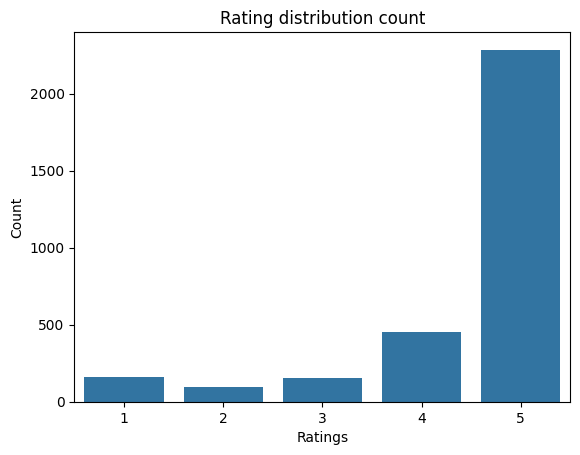

In [46]:
#count plot to visualize the total counts of each rating

sns.countplot(x=data['rating'])
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [52]:
#Finding the percentage distribution of each rating - we'll divide the number of records for each rating by total number of records

#print(f"Rating value count - percentage distribution: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")
print(f"Rating value count - percentage distribution: \n {data['rating'].value_counts()}")

Rating value count - percentage distribution: 
 rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


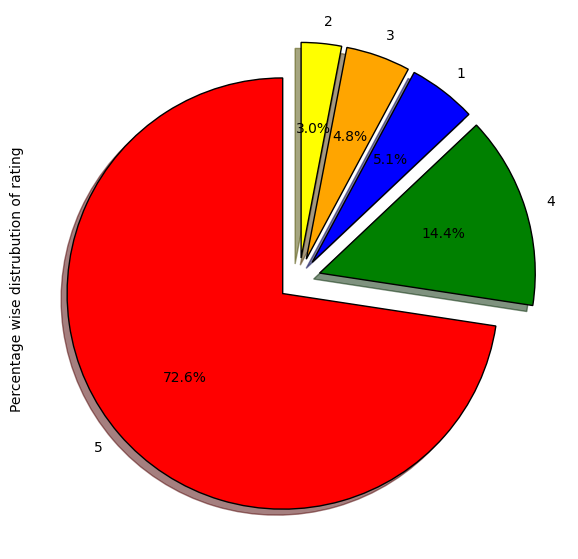

In [53]:
# Let's plot the above values in a pie chart
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['rating'].value_counts()/data.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

* 5 start Rating is maximum .Its approx 73 per cent 
* 2 star Rating is less in number.

### Analyzing 'feedback' column

In [56]:
#Distinct values of 'feedback' and its count 

print(f"Feedback value count: \n{data['feedback'].value_counts()}")

Feedback value count: 
feedback
1    2893
0     256
Name: count, dtype: int64


There are 2 distinct values of 'feedback' present - 0 and 1. Let's see what kind of review each value corresponds to.

feedback value = 0

In [69]:
#Extracting the 'verified_reviews' value for one record with feedback = 0

review_0 = data[data['feedback'] == 0].iloc[3]['verified_reviews']
print(review_0)

"Stopped working after 2 weeks ,didn't follow commands!? Really fun when it was working?"


In [67]:
#Extracting the 'verified_reviews' value for one record with feedback = 1

review_1 = data[data['feedback'] == 1].iloc[3]['verified_reviews']
print(review_1)

"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well."


In [70]:
#Finding the percentage distribution of each feedback - we'll divide the number of records for each feedback by total number of records

print(f"Feedback value count - percentage distribution: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
feedback
1    91.87
0     8.13
Name: count, dtype: float64


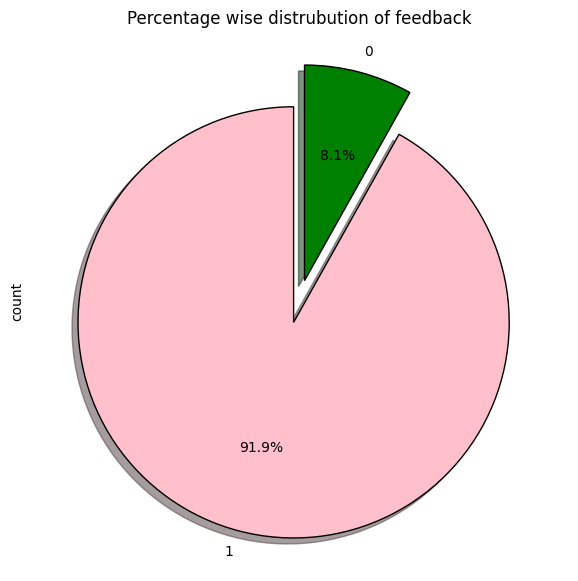

In [74]:
fig = plt.figure(figsize=(7,7))

colors = ('pink', 'green')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['feedback'].value_counts()/data.shape[0]

explode=(0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, title='Percentage wise distrubution of feedback')
plt.show()

### Rating And Feedback Wise Analysis

#Feedback = 0
data[data['feedback'] == 0]['rating'].value_counts()

In [75]:
#Feedback = 0
data[data['feedback'] == 0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [76]:
#Feedback = 1
data[data['feedback'] == 1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

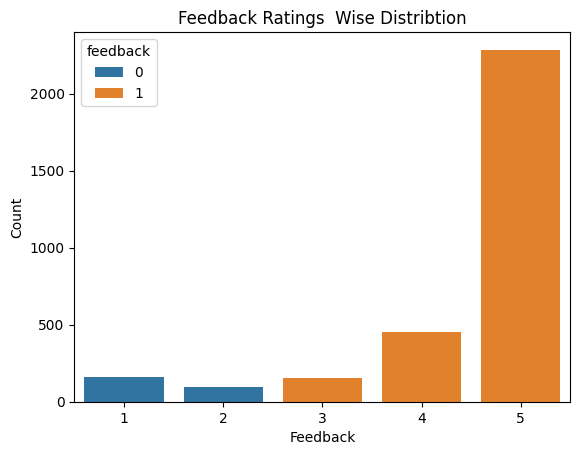

In [80]:
sns.countplot(data=data, hue='feedback',x='rating')
plt.title('Feedback Ratings  Wise Distribtion')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

* If rating of a review is 1 or 2 then the feedback is 0 (negative) 
* If the rating is 3, 4 or 5 then the feedback is 1 (positive).

### Analyzing 'variation' column

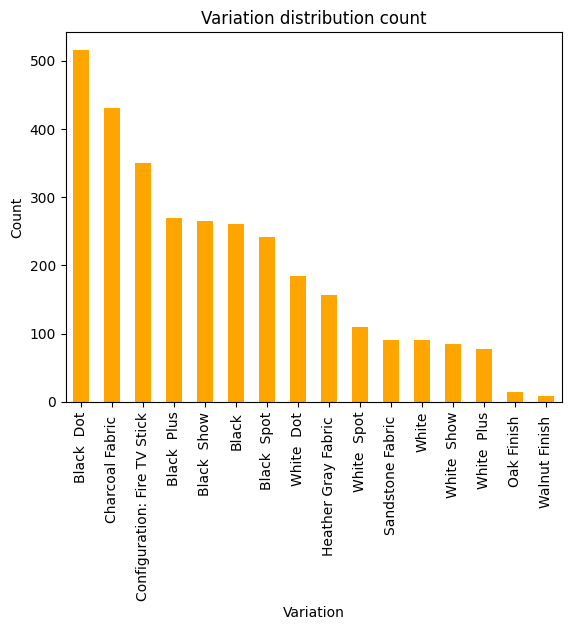

In [81]:
#Bar graph to visualize the total counts of each variation

data['variation'].value_counts().plot.bar(color = 'orange')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [82]:
#Finding the percentage distribution of each variation - we'll divide the number of records for each variation by total number of records

print(f"Variation value count - percentage distribution: \n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")

Variation value count - percentage distribution: 
variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


Mean rating according to variation

In [88]:
data.groupby('variation')['rating'].mean().sort_values(ascending=False)

variation
Walnut Finish                   4.888889
Oak Finish                      4.857143
Charcoal Fabric                 4.730233
Heather Gray Fabric             4.694268
Configuration: Fire TV Stick    4.591429
Black  Show                     4.490566
Black  Dot                      4.453488
White  Dot                      4.423913
Black  Plus                     4.370370
White  Plus                     4.358974
Sandstone Fabric                4.355556
White  Spot                     4.311927
Black  Spot                     4.311203
White  Show                     4.282353
Black                           4.233716
White                           4.166667
Name: rating, dtype: float64

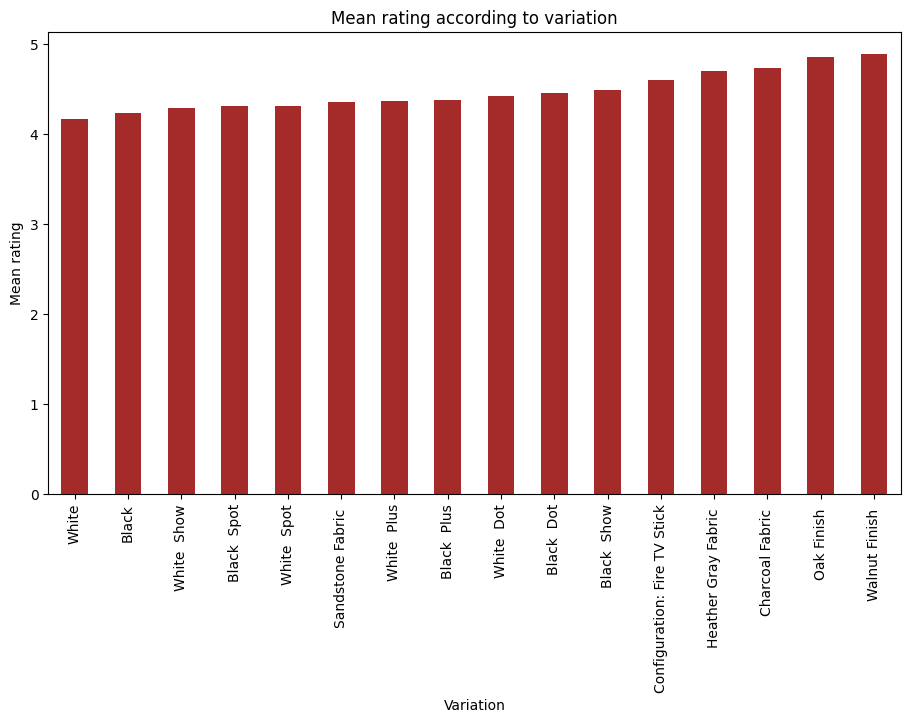

In [84]:
# Analyze the above ratings
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

* Black  Dot, Charcoal Fabric arethe highest selling one.
* Oak Finish , Walnut Finish are the least selling model.
* Walnut Finish,  Oak Finish, Charcoal Fabric   have highest average reviews.


### Analyzing 'verified_reviews' column

The 'length' column is new generated column - stores the length of 'verified_reviews' for that record. Let's check for some sample records

In [90]:
data['length'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

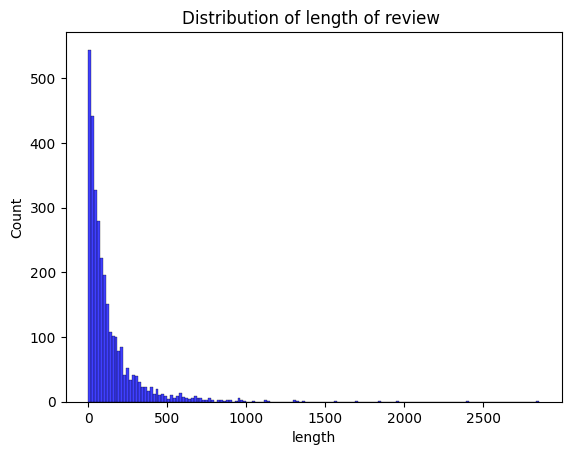

In [94]:
#Length analysis
sns.histplot(data['length'],color='blue').set(title='Distribution of length of review ')
plt.show()

Length analysis when feedback is 0 (negative)

In [96]:
data[data['feedback']==0]['length'][:5]

46     165
111     53
141     18
162     89
176     20
Name: length, dtype: int64

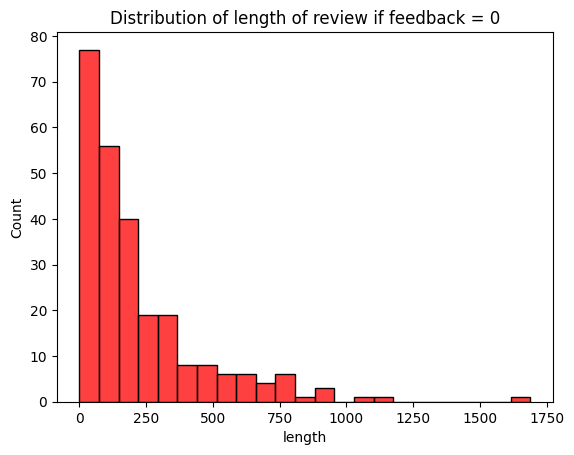

In [97]:
sns.histplot(data[data['feedback']==0]['length'],color='red').set(title='Distribution of length of review if feedback = 0')
plt.show()

Length analysis when feedback is 1 (positive)

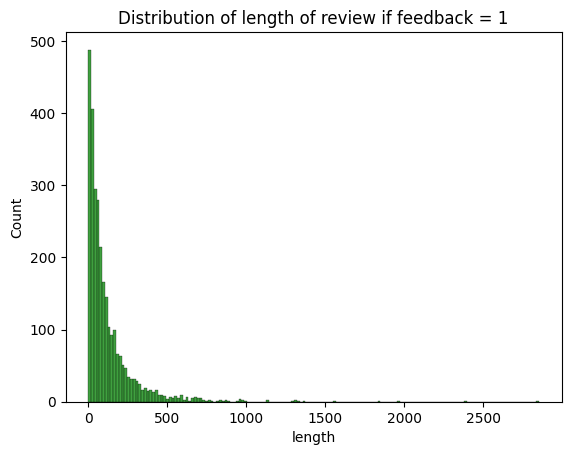

In [98]:
sns.histplot(data[data['feedback']==1]['length'],color='green').set(title='Distribution of length of review if feedback = 1')
plt.show()

In [106]:
data[data['length']>480]["verified_reviews"][39]

'"This is my first digital assistant so I\'m giving this a good review. Speaker is really good for the cheap price on Prime day. Fun to play with and can be used as an alarm clock (That\'s what I was going to get in the first place, but I ended up with Echo). If you haven\'t had a go with one then definitely try it!What I like best is the number of other devices that it can connect with. My purchase came with a Smart Plug for $10 which I connect my lamp to. Alexa, turn of the lights!"'

Lenghth Wise Rating

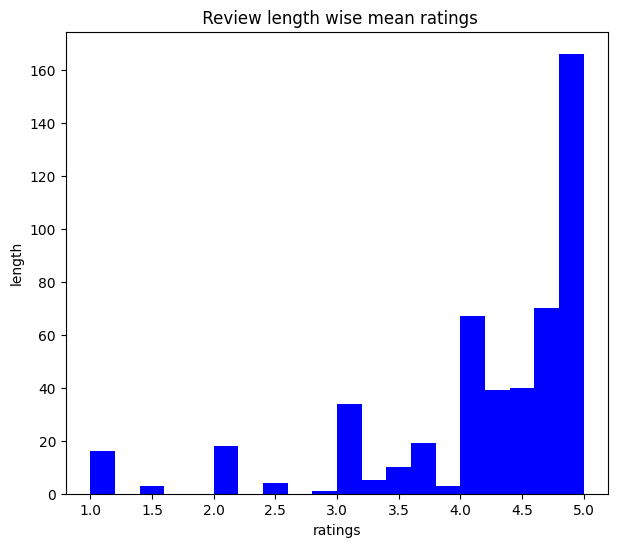

In [99]:
data.groupby('length')['rating'].mean().plot.hist(color = 'blue', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

* On average mean rating higher than 4 have high word count in reviews.
* When feedback is 1 then word count of reviews is very high 

In [107]:
data.to_csv("data\cleaned_amazon_alexa.tsv")